In [4]:
import pandas as pd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos
from sklearn.cluster import KMeans

In [5]:
path = 'C:/Users/sala5/Desktop/hogar.csv'
df = pd.read_csv(path, encoding='latin', low_memory=False)
df.head()

,ï»¿folioviv,foliohog,huespedes,huesp_come,num_trab_d,edad_trab1,edad_trab2,edad_trab3,edad_trab4,edad_trab5,edad_trab6,edad_trab7,edad_trab8,edad_trab9,edad_tra10,tot_integ,tot_hom,tot_muj
0,100006018,1,0,,0,,,,,,,,,,,4,2,2
1,100006037,1,0,,0,,,,,,,,,,,2,2,0
2,100006055,1,0,,0,,,,,,,,,,,2,1,1
3,100006068,1,0,,0,,,,,,,,,,,4,2,2
4,100006085,1,0,,0,,,,,,,,,,,4,2,2


In [6]:
df.rename(columns={'ï»¿folioviv':'folioviv'}, inplace=True)

In [7]:
df

,folioviv,foliohog,huespedes,huesp_come,num_trab_d,edad_trab1,edad_trab2,edad_trab3,edad_trab4,edad_trab5,edad_trab6,edad_trab7,edad_trab8,edad_trab9,edad_tra10,tot_integ,tot_hom,tot_muj
0,100006018,1,0,,0,,,,,,,,,,,4,2,2
1,100006037,1,0,,0,,,,,,,,,,,2,2,0
2,100006055,1,0,,0,,,,,,,,,,,2,1,1
3,100006068,1,0,,0,,,,,,,,,,,4,2,2
4,100006085,1,0,,0,,,,,,,,,,,4,2,2
5,100010009,1,0,,0,,,,,,,,,,,3,2,1
6,100010039,1,0,,0,,,,,,,,,,,3,2,1
7,100010066,1,0,,0,,,,,,,,,,,2,1,1
8,100010091,1,0,,0,,,,,,,,,,,6,2,4
9,100010119,1,0,,0,,,,,,,,,,,4,2,2


In [8]:
df.fillna(99, inplace = True)
df.drop('folioviv', axis=1, inplace=True)


In [9]:
df = df.convert_objects(convert_numeric=True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [10]:
df.dtypes

foliohog        int64
huespedes       int64
huesp_come    float64
num_trab_d      int64
edad_trab1    float64
edad_trab2    float64
edad_trab3    float64
edad_trab4    float64
edad_trab5    float64
edad_trab6    float64
edad_trab7    float64
edad_trab8    float64
edad_trab9    float64
edad_tra10    float64
tot_integ       int64
tot_hom         int64
tot_muj         int64
dtype: object

In [11]:
df.fillna(99, inplace = True)


In [12]:
df = df.astype('int64')

In [13]:
n = df.columns.values.tolist()
m = round(df.shape[0]*.50)
l = []
for i in n:
    if df[i].value_counts().get(99) != None:
        if m < df[i].value_counts().get(99):
            l.append(i)
            df = df.drop(i, 1)

In [15]:
df.tot_muj.value_counts()

df.to_csv('C:/Users/sala5/Desktop/Hogar-Lp16.csv')


##En este caso la base quedo correcta ya que no quedo ninguna categoria con valor 99
en dado caso que hubiera tenido 99  50 , hubiera que tenido que sustituir los 99 por un valor mas sercano a la categoria es como si el valor maximo de la catergoria hubiera sido 45, los 99 hubieran sido sustituidos por 46!!

NORMALIZAMOS EL DATAFRAME Y GRAFICAMOS CON LA FUNCION ELBOW

In [16]:
df = sk.preprocessing.normalize(df, norm='l2', axis=1, copy=True)#,return_norm=False)

#df.to_csv('C:/Users/sala5/Desktop/Hogar-Lp16.csv')


APLICAR K MEANS EN TODOS DESPUES DE NORMALIZAR Y LUEGO OTRO ALGORITMO 

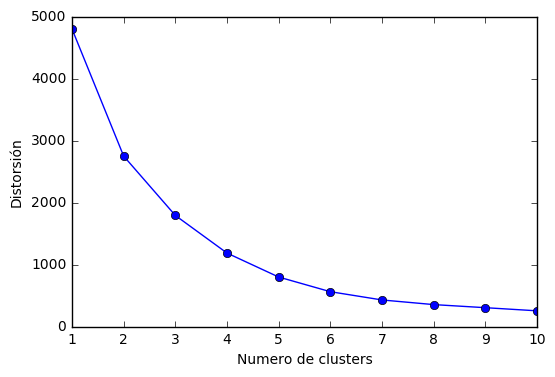

In [17]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

K MEANS

In [18]:
clusters = KMeans(n_clusters=4,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0)

In [19]:
y_km = clusters.fit_predict(df)
y_km

array([0, 1, 0, ..., 3, 3, 3])

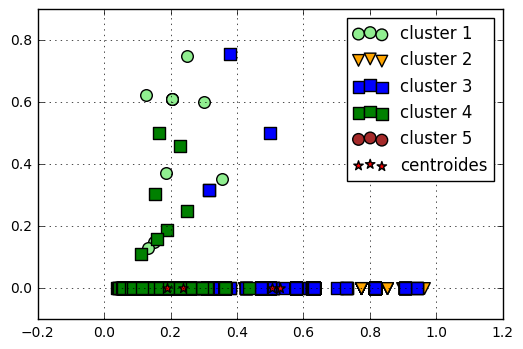

In [20]:
plt.scatter(df[y_km==0,0],
          df[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(df[y_km==1,0],
          df[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(df[y_km==2,0],
          df[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(df[y_km==3,0],
          df[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(df[y_km==4,0],
          df[y_km==4,1],
          s=70,
          c='brown',
          edgecolor='black',
          marker='o',
          label='cluster 5')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
df.shape

(59079, 6)

In [22]:
ward = AgglomerativeClustering(n_clusters=4, 
                               affinity='euclidean', 
                               linkage='ward')

y_w = ward.fit_predict(df)

MemoryError: unable to allocate array data.